<a href="https://colab.research.google.com/github/beedrumms/Exploring-Public-Responses-to-Government-COVID-19-Policies/blob/main/6)_A)_ON_Policies_and_Sentiments_Analysis_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#installing vader and nltk 
!pip install nltk 
!pip install vaderSentiment

In [ ]:
# import essential packages for preprocessing steps
import pandas as pd
import numpy as np
from google.colab import drive, files
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from pylab import rcParams
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
obj = SentimentIntensityAnalyzer()
from datetime import datetime
import matplotlib.colors as mcolors
# Mounting google colab on drive 
drive.mount("/content/drive")

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROCESSED_ONTARIO_COVID19_TWEETS.csv')    
tweets_df = data[['Datetime', 'Text', 'Text_Unprocessed']]
tweets_df.columns, tweets_df.shape # ensuring everthing read in properly

(Index(['Datetime', 'Text', 'Text_Unprocessed'], dtype='object'), (421109, 3))

In [ ]:
# Dropping troublesome rows
is_na = tweets_df['Text'].isna()
is_nalist = tweets_df[is_na]
print(is_nalist)
is_not_na = tweets_df['Text'].notna()
tweets_df = tweets_df[is_not_na]
tweets_df

          Datetime Text                                Text_Unprocessed
1178    2021-05-30  NaN                        down,  to go...         
4919    2021-05-23  NaN                          this 👇🏾               
6840    2021-05-20  NaN                                  👇🏻😡 when      
17020   2021-05-07  NaN                     please please please       
20528   2021-05-03  NaN                        so..  how about that    
...            ...  ...                                             ...
420603  2020-03-13  NaN                             and   your move    
420639  2020-03-13  NaN                                                
420770  2020-03-12  NaN                              please            
420799  2020-03-12  NaN                                                
421027  2020-03-05  NaN                                                

[793 rows x 3 columns]


,Datetime,Text,Text_Unprocessed
0,2021-05-31,be nt pandemic hell attend hundred thousand si...,arent we in a pandemic who the hell is atte...
1,2021-05-31,poor doctor tonight likely pass million billin...,here is one of those poor doctors here ton...
2,2021-05-31,resident sick covid family court bankrupt jail...,how about if you make a resident sick with co...
3,2021-05-31,allow pandemic screw,we will never be allowed to be done with thi...
4,2021-05-31,honestly love response question fan attendance...,would honestly love a response to this ques...
...,...,...,...
421104,2020-03-01,video corona virus remind virus politician,this is the video of corona virus but it remin...
421105,2020-03-01,benefit lack setback weather virus,would benefit from lack of setbacks... sti...
421106,2020-03-01,history come coronavirus pandemic covid lesson...,history: here comes the coronavirus pandemic ...
421107,2020-03-01,epidemic expert jonathan quick worstcase scena...,epidemics expert jonathan quick : ‘the worstca...


In [ ]:
compound_list = []
# Using unprocessed text for better performance
for t in tweets_df['Text_Unprocessed']:
  score = obj.polarity_scores(t)
  compound_list.append(score['compound'])

In [ ]:
tweet_Sentiment_data = tweets_df.copy()
# Adding compound scores to our dataframe
tweet_Sentiment_data['Sentiment_Score'] = compound_list

# Changing the tweet sentiment dataset datetime field to datetime object
tweet_Sentiment_data['Datetime'] = pd.to_datetime(tweet_Sentiment_data['Datetime']) # converting to datetime
tweet_Sentiment_data['Datetime'] = tweet_Sentiment_data['Datetime'].dt.date # converting to just Year-Month-Day format 
tweet_Sentiment_data.Datetime.head(1), tweet_Sentiment_data.Datetime.tail(1)

(0    2021-05-31
 Name: Datetime, dtype: object, 421108    2020-03-01
 Name: Datetime, dtype: object)

In [ ]:
grouped = tweet_Sentiment_data['Sentiment_Score'].groupby(tweet_Sentiment_data['Datetime'])
compound_sentiment_daily_avgs = grouped.mean()

In [ ]:
ontario = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/OxCGRT_Ontario.csv')

In [ ]:
ontario['Date'] = pd.to_datetime(ontario['Date']) # converting to datetime
ontario['Date'] = ontario['Date'].dt.date # converting to just Year-Month-Day format 
ontario.Date.head(1), ontario.Date.tail(1)

(0    2020-03-01
 Name: Date, dtype: object, 456    2021-05-31
 Name: Date, dtype: object)

In [ ]:
# new range = 0-100 
# new off set is 50 
# We want to change the range first 
# range is multiplication 
# current distnace between -1 and 1 is 2. So every number X 50 
# to chagne the off set - it is simple addition (every number + 50)
# range you want divided by range you have == new scaling factor 
# rescaling my sentiment scores to be on the same scale as my policy indices 
rescale = compound_sentiment_daily_avgs*50
new_compound_scores = rescale + 50 

In [ ]:
# Looking at the number of days that rank positive on the new scale (positive is 0.05+ so 52.5 on the new scale)
temp = new_compound_scores >= 52.5
positive_days = new_compound_scores[temp]
print(positive_days, 'Number of positive days:', len(positive_days))

Datetime
2020-03-19    53.270212
2020-03-21    53.889546
2020-03-27    53.500941
2020-03-28    52.648802
2020-03-30    53.267477
2020-03-31    53.000351
2020-04-02    53.189213
2020-04-03    53.185180
2020-04-04    55.294948
2020-04-05    53.002190
2020-04-06    53.773333
2020-04-07    55.322057
2020-04-12    53.000140
2020-04-14    53.545048
2020-04-17    52.582152
2020-04-24    52.618640
2020-04-29    53.127420
2020-05-01    53.324371
2020-07-29    52.832210
Name: Sentiment_Score, dtype: float64 Number of positive days: 19


In [ ]:
# Creating visual lines for the sentiment scores that will demonstrate the neutral zone
neutral_line = []
for i in range(457):
  neutral_line.append(50)

neutral_range_t = []
for i in range(457):
  neutral_range_t.append(52.5)

neutral_range_b = []
for i in range(457):
  neutral_range_b.append(47.5)

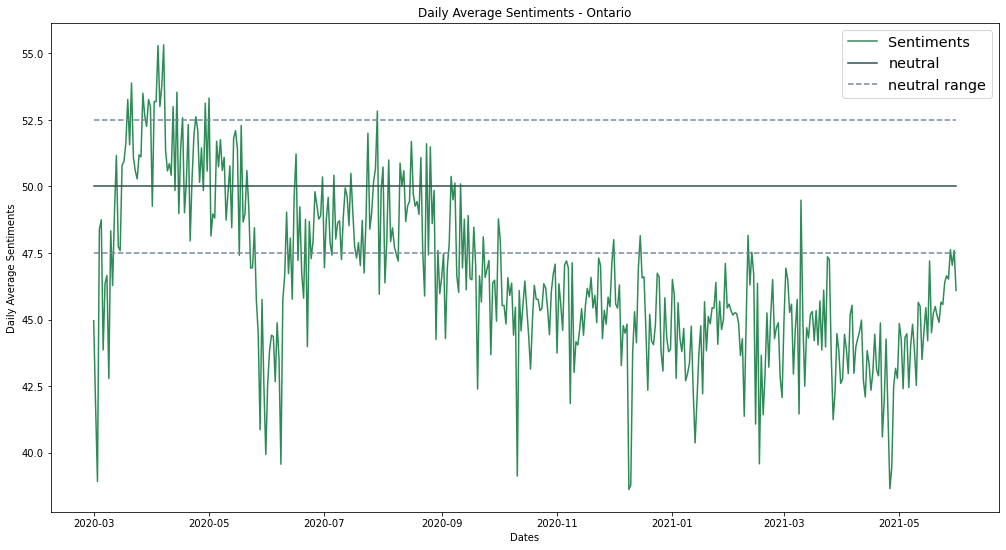

In [ ]:
# Going to visualize these sentiments over time 
x_val = new_compound_scores.index
y_val = new_compound_scores

plt.plot(x_val, y_val, color = 'seagreen', label='Sentiments')
plt.plot(x_val, neutral_line, color = 'darkslategrey', label='neutral')
plt.plot(x_val, neutral_range_t, color = 'lightslategrey', label='neutral range', linestyle='dashed')
plt.plot(x_val, neutral_range_b, color = 'lightslategrey', linestyle='dashed')
plt.xlabel("Dates")
plt.ylabel("Daily Average Sentiments")
plt.title("Daily Average Sentiments - Ontario")
plt.legend(fontsize='x-large')
plt.rc('figure', figsize=(20,10))
plt.show()

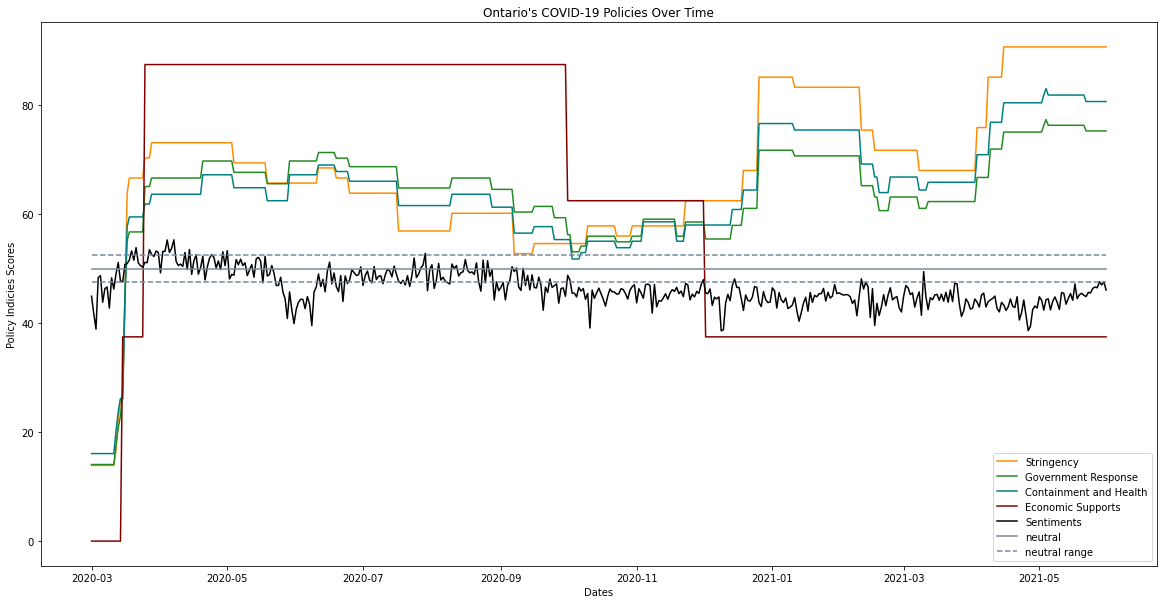

In [ ]:
date = ontario['Date'].unique()
x_val = new_compound_scores.index
y_val = new_compound_scores

stringency_ON = ontario['StringencyIndex']
gov_response_ON = ontario['GovernmentResponseIndex']
containment_health_ON = ontario['ContainmentHealthIndex']
economic_supports_ON = ontario['EconomicSupportIndex']

plt.plot(date, stringency_ON, color = 'darkorange', label = 'Stringency')
plt.plot(date, gov_response_ON, color = 'forestgreen', label = 'Government Response')
plt.plot(date, containment_health_ON, color = 'teal', label = 'Containment and Health')
plt.plot(date, economic_supports_ON, color = 'maroon', label = 'Economic Supports')

plt.plot(x_val, y_val, color = 'black', label = 'Sentiments')
plt.plot(date, neutral_line, color = 'lightslategrey', label='neutral')
plt.plot(x_val, neutral_range_t, color = 'lightslategrey', label='neutral range', linestyle='dashed')
plt.plot(x_val, neutral_range_b, color = 'lightslategrey', linestyle='dashed')
plt.xlabel("Dates")
plt.ylabel("Policy Indicies Scores")
plt.title("Ontario's COVID-19 Policies Over Time")
plt.legend()
plt.rc('figure', figsize=(25, 11))
plt.show()

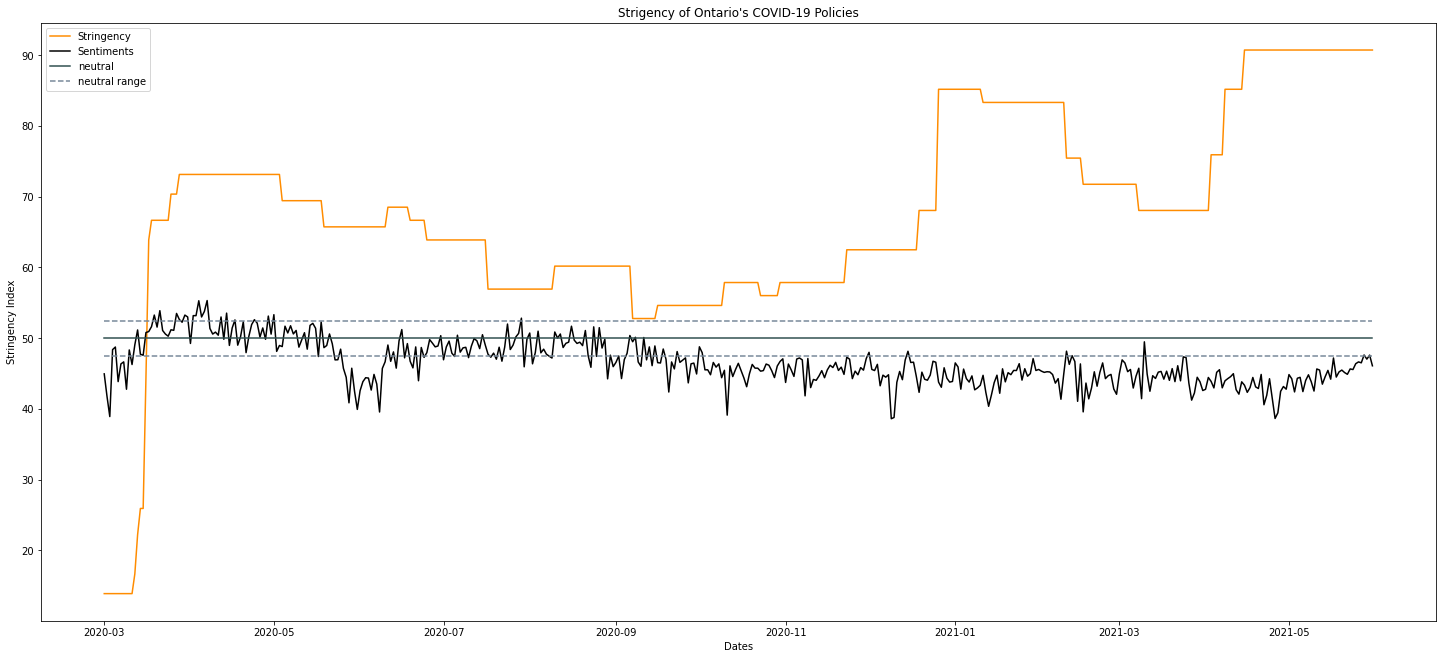

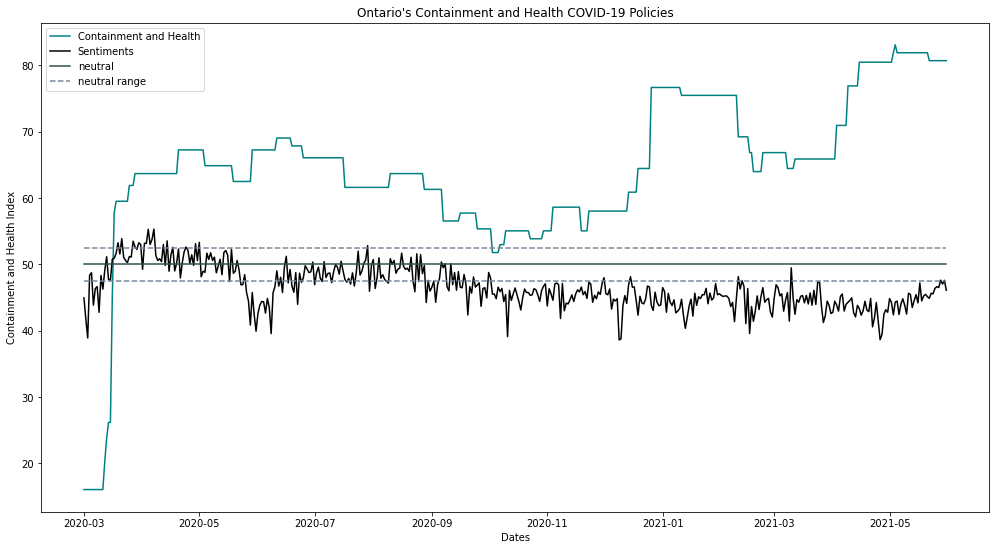

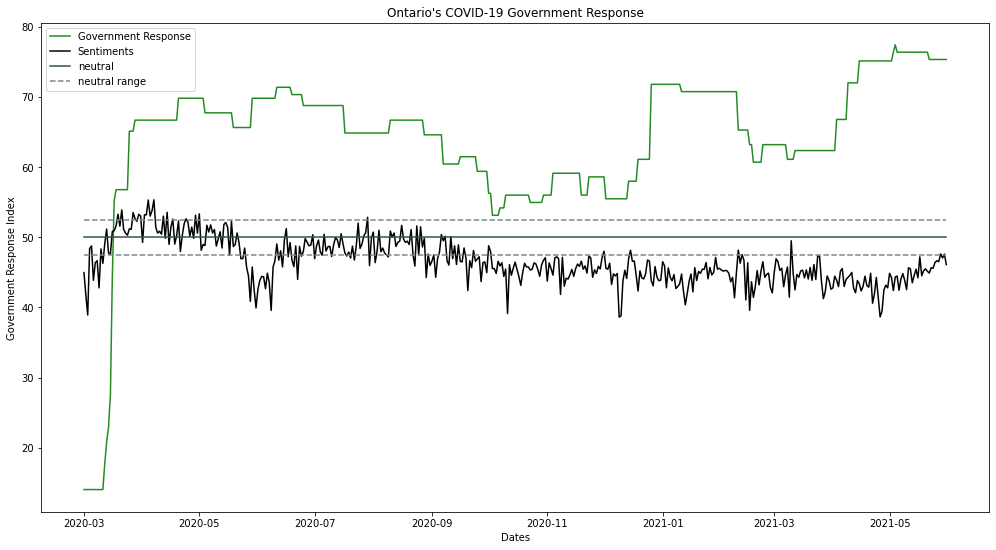

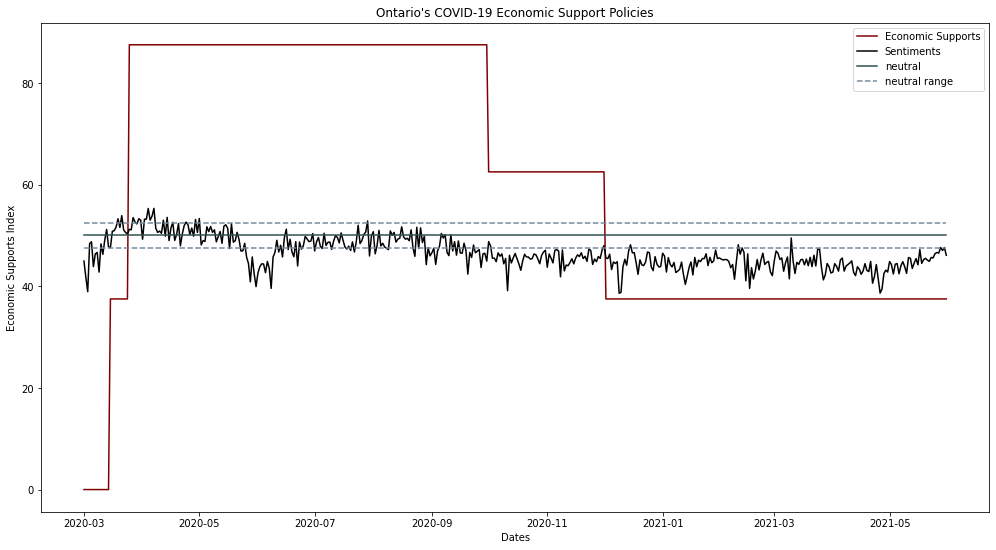

In [ ]:
date = ontario['Date'].unique()
x_val = new_compound_scores.index
y_val = new_compound_scores

stringency_ON = ontario['StringencyIndex']
plt.plot(date, stringency_ON, color = 'darkorange', label = 'Stringency')
plt.plot(x_val, y_val, color = 'black', label = 'Sentiments')
plt.plot(x_val, neutral_line, color = 'darkslategrey', label='neutral')
plt.plot(x_val, neutral_range_t, color = 'lightslategrey', label='neutral range', linestyle='dashed')
plt.plot(x_val, neutral_range_b, color = 'lightslategrey', linestyle='dashed')
plt.xlabel("Dates")
plt.ylabel("Stringency Index")
plt.title("Strigency of Ontario's COVID-19 Policies")
plt.legend()
plt.rc('figure', figsize=(17, 9))
plt.show()

containment_health_ON = ontario['ContainmentHealthIndex']
plt.plot(date, containment_health_ON, color = 'teal', label = 'Containment and Health')
plt.plot(x_val, y_val, color = 'black', label = 'Sentiments')
plt.plot(x_val, neutral_line, color = 'darkslategrey', label='neutral')
plt.plot(x_val, neutral_range_t, color = 'lightslategrey', label='neutral range', linestyle='dashed')
plt.plot(x_val, neutral_range_b, color = 'lightslategrey', linestyle='dashed')
plt.xlabel("Dates")
plt.ylabel("Containment and Health Index")
plt.title("Ontario's Containment and Health COVID-19 Policies")
plt.legend()
plt.rc('figure', figsize=(17, 9))
plt.show()

gov_response_ON = ontario['GovernmentResponseIndex']
plt.plot(date, gov_response_ON, color = 'forestgreen', label = 'Government Response')
plt.plot(x_val, y_val, color = 'black', label = 'Sentiments')
plt.plot(x_val, neutral_line, color = 'darkslategrey', label='neutral')
plt.plot(x_val, neutral_range_t, color = 'lightslategrey', label='neutral range', linestyle='dashed')
plt.plot(x_val, neutral_range_b, color = 'lightslategrey', linestyle='dashed')
plt.xlabel("Dates")
plt.ylabel("Government Response Index")
plt.title("Ontario's COVID-19 Government Response")
plt.legend()
plt.rc('figure', figsize=(17, 9))
plt.show()


economic_supports_ON = ontario['EconomicSupportIndex']
plt.plot(date, economic_supports_ON, color = 'maroon', label = 'Economic Supports')
plt.plot(x_val, y_val, color = 'black', label = 'Sentiments')
plt.plot(x_val, neutral_line, color = 'darkslategrey', label='neutral')
plt.plot(x_val, neutral_range_t, color = 'lightslategrey', label='neutral range', linestyle='dashed')
plt.plot(x_val, neutral_range_b, color = 'lightslategrey', linestyle='dashed')
plt.xlabel("Dates")
plt.ylabel("Economic Supports Index")
plt.title("Ontario's COVID-19 Economic Support Policies")
plt.legend()
plt.rc('figure', figsize=(17, 9))
plt.show()

In [ ]:
# Importing covid-19 case and mortality data over time 
case = pd.read_csv('https://raw.githubusercontent.com/ccodwg/Covid19Canada/master/timeseries_prov/cases_timeseries_prov.csv')
mortalities = pd.read_csv('https://raw.githubusercontent.com/ccodwg/Covid19Canada/master/timeseries_prov/mortality_timeseries_prov.csv')

In [ ]:
# filtering data to province and dates desired
filter1 = case['province'] == 'Ontario'
ontario_cases = case[filter1]
ontario_cases = ontario_cases[36:493]

filter2 = mortalities['province'] == 'Ontario'
ontario_mortalities = mortalities[filter2]
ontario_mortalities = ontario_mortalities[:450]

In [ ]:
ontario_cases.columns, ontario_mortalities.columns

(Index(['province', 'date_report', 'cases', 'cumulative_cases'], dtype='object'),
 Index(['province', 'date_death_report', 'deaths', 'cumulative_deaths'], dtype='object'))

In [ ]:
ontario_cases['date_report'] = pd.to_datetime(ontario_cases['date_report']) # converting to datetime
ontario_cases['date_report'] = ontario_cases['date_report'].dt.date # converting to just Year-Month-Day format 
ontario_cases['date_report'].head(1), ontario_cases['date_report'].tail(1)

ontario_mortalities['date_death_report'] = pd.to_datetime(ontario_mortalities['date_death_report']) # converting to datetime
ontario_mortalities['date_death_report'] = ontario_mortalities['date_death_report'].dt.date # converting to just Year-Month-Day format 
ontario_mortalities['date_death_report'].head(1), ontario_mortalities['date_death_report'].tail(1)

(4392    2020-08-03
 Name: date_death_report, dtype: object, 4841    2021-05-31
 Name: date_death_report, dtype: object)

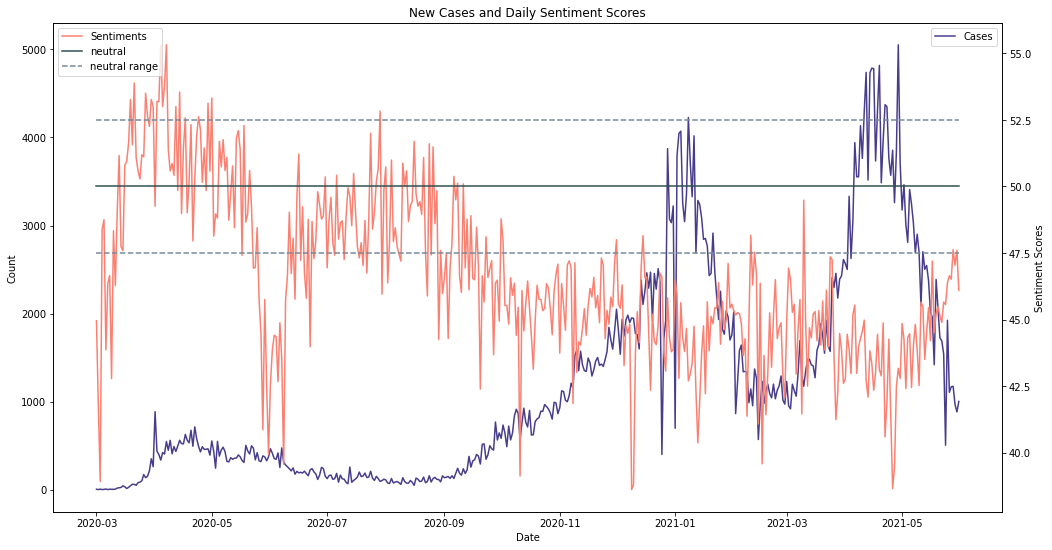

In [ ]:
x_val = new_compound_scores.index
y_val = new_compound_scores

x_c = ontario_cases['cases']
date = ontario['Date'].unique()

fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(date, x_c, label = 'Cases', color = 'darkslateblue')
ax2.plot(x_val, y_val, color = 'salmon', label = 'Sentiments')
ax2.plot(x_val, neutral_line, color = 'darkslategrey', label='neutral')
ax2.plot(x_val, neutral_range_t, color = 'lightslategrey', label='neutral range', linestyle='dashed')
ax2.plot(x_val, neutral_range_b, color = 'lightslategrey', linestyle='dashed')
legend = ax.legend(loc='upper right', fontsize='medium')
legend2 = ax2.legend(loc='upper left', fontsize='medium')
ax.set_xlabel('Date')
ax.set_ylabel('Count')
ax2.set_ylabel('Sentiment Scores')
plt.title('New Cases and Daily Sentiment Scores')
plt.rc('figure', figsize=(17, 9))
plt.show()

####note the second axis - did not re-normalize the compound scores to fit the cases or deaths scales 

In [ ]:
ontario_mortalities['date_death_report']

4392    2020-08-03
4393    2020-09-03
4394    2020-10-03
4395    2020-11-03
4396    2020-12-03
           ...    
4837    2021-05-27
4838    2021-05-28
4839    2021-05-29
4840    2021-05-30
4841    2021-05-31
Name: date_death_report, Length: 450, dtype: object

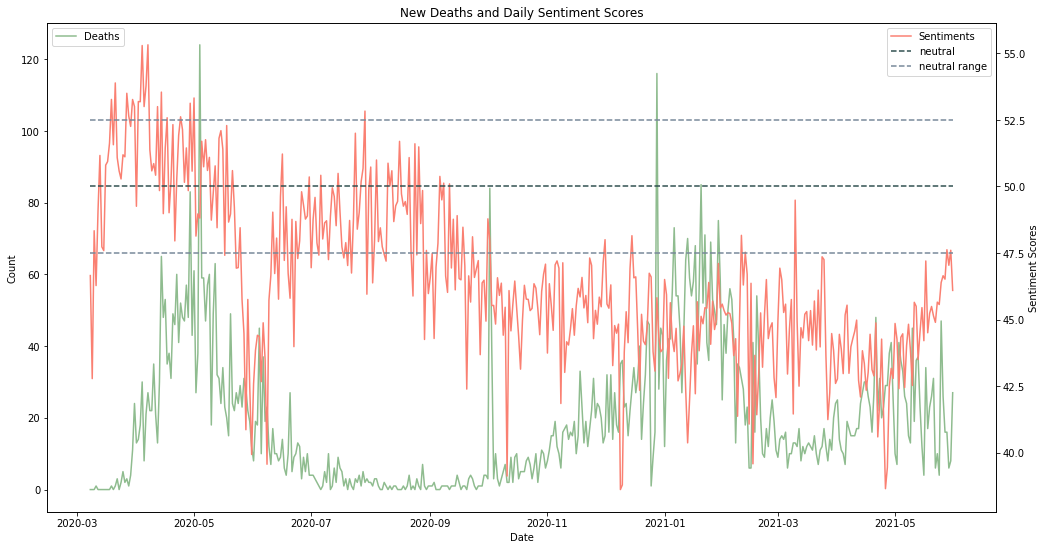

In [ ]:
deaths_compound_scale = new_compound_scores[7:] # deaths data start 7 days after March 1st, 2020
x_val2 = deaths_compound_scale.index
y_val2 = deaths_compound_scale

x_d = ontario_mortalities['deaths']

fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(x_val2, x_d, label = 'Deaths', color = 'darkseagreen')
ax2.plot(x_val2, y_val2, color = 'salmon', label = 'Sentiments')
ax2.plot(x_val2, neutral_line[7:], color = 'darkslategrey', label='neutral', linestyle='dashed')
ax2.plot(x_val2, neutral_range_t[7:], color = 'lightslategrey', label='neutral range', linestyle='dashed')
ax2.plot(x_val2, neutral_range_b[7:], color = 'lightslategrey', linestyle='dashed')
legend = ax.legend(loc='upper left', fontsize='medium')
legend2 = ax2.legend(loc='upper right', fontsize='medium')
ax.set_xlabel('Date')
ax.set_ylabel('Count')
ax2.set_ylabel('Sentiment Scores')
plt.title('New Deaths and Daily Sentiment Scores')
plt.rc('figure', figsize=(17, 9))
plt.show()

In [ ]:
# Going to save a new dataframe to use compound scores going forward 
normalized_scores = [] 
for t in tweet_Sentiment_data['Sentiment_Score']: 
  normalized_scores.append((t*50)+50)

tweet_Sentiment_data['Sentiment_Score_Norm'] = normalized_scores

In [ ]:
# Note that: 
  # positive sentiment: compound score >= 0.05
  # neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
  # negative sentiment: compound score <= -0.05

sentiments = [] 
for t in tweet_Sentiment_data['Sentiment_Score']:
  if t >= 0.05:
    sentiments.append('positive')
  elif t <= -0.05:
    sentiments.append('negative')
  else:
    sentiments.append('neutral')

tweet_Sentiment_data['Sentiment'] = sentiments

In [ ]:
tweet_Sentiment_data.to_csv('/content/drive/MyDrive/Colab Notebooks/ONTARIO_COVID19_TWEETS_SENTS.csv')